In [1]:
# Hands-On With Python

## B-J-R-V: The objective of our group is...TBD

*In this walk-through, we will be covering four main techniques to get you comfortable manipulating data with Python.*

#### Background
I'm sure many of you are familiar with the blue and white bikes throughout Pittsburgh which are known to some as "Healthy Rides". Pittsburgh Bike Share, a non-profit located in the Strip District, works to maintain the Healthy Ride bike stations and bikes. The hardware and software is provided by nextbike, which allows Pittsburgh Bike Share to post the data publicly. The dataset can be obtained [here](https://healthyridepgh.com/data/). We will be focusing on the Q2 2017 data, which is already downloaded to this repository. There are two files: `rentals.csv` which provides information on individual rides and `stations.csv` which provides additional information about each bike station.

#### Overview
1. Reading data into a data frame (and previewing it)
2. Selecting/manipulating data
3. Aggregating data
4. Plotting data

At the end, you can try your hand at aggregating and plotting the healthy ride data on your own.

### 1. Reading data into a data frame
Here, we import the pandas package (commonly referred to as "pd").

In [2]:
import pandas as pd
import numpy as np

Next, we read in the rentals.csv file (with the `encoding='latin-1'` parameter) and preview the data using `rentals_df.head()`

In [3]:
rentals_df = pd.read_csv('rentals.csv', encoding='latin-1')

rentals_df.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer
1,27193815,4/1/2017 1:43,4/1/2017 1:48,70353,284,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber
2,27194749,4/1/2017 2:35,4/1/2017 3:01,70067,1576,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Customer
3,27201194,4/1/2017 5:05,4/1/2017 7:46,70191,9695,1005,Forbes Ave & Grant St,1043,Coltart Ave & Forbes Ave,Customer
4,27203670,4/1/2017 5:35,4/1/2017 5:54,70353,1164,1038,Boulevard of the Allies & Parkview Ave,1047,S 22nd St & E Carson St,Subscriber


We can use the `.shape` attribute of the data frame to see the count of records and number of columns.

In [4]:
rentals_df.shape

(24423, 10)

In [5]:
print("There are {} records and {} columns in the rentals.csv file.".format(rentals_df.shape[0], rentals_df.shape[1]))

There are 24423 records and 10 columns in the rentals.csv file.


Also, we can see what data types Python assigned to each column using `rentals_df.dtypes`

In [6]:
rentals_df.dtypes

Trip id               int64
Starttime            object
Stoptime             object
Bikeid                int64
Tripduration          int64
From station id       int64
From station name    object
To station id         int64
To station name      object
Usertype             object
dtype: object

### 2. Selecting and manipulating data
Here, we will see how to select, rename and do some basic calculations with data frames.

The data set shows us the trip duration (in seconds), but we would like to see the duration in minutes.

To convert the trip duration from seconds to minutes, we create a new column `Tripduration_mins` by taking the value in `Tripduration` and dividing it by 60. Then we use the `.tail()` method to check the results.

It is important to note that we are **not** looping through each element - the operation of "divide by 60" is applied to each element automatically.

In [7]:
rentals_df['Tripduration_mins'] = rentals_df['Tripduration'] / 60

rentals_df.tail()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Tripduration_mins
24418,33295197,6/30/2017 23:38,6/30/2017 23:58,70240,1212,1023,Liberty Ave & Baum Blvd,1028,Penn Ave & Putnam St (Bakery Square),Customer,20.200000
24419,33295206,6/30/2017 23:38,6/30/2017 23:56,70178,1030,1023,Liberty Ave & Baum Blvd,1028,Penn Ave & Putnam St (Bakery Square),Customer,17.166667
24420,33295257,6/30/2017 23:45,7/1/2017 0:07,70490,1351,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1019,42nd St & Butler St,Customer,22.516667
24421,33295318,6/30/2017 23:55,7/1/2017 0:02,70019,424,1049,S 12th St & E Carson St,1045,S 27th St & Sidney St. (Southside Works),Customer,7.066667
24422,33295336,6/30/2017 23:58,7/1/2017 0:15,70400,1008,1021,Taylor St & Liberty Ave,1024,S Negley Ave & Baum Blvd,Customer,16.800000


Now, we want to create another column that just has the date of the `Starttime` date time column - so that we can see how many rides occur on a given day.

To do this, we use the `pd.to_datetime` function, which requires a string column and date time format as parameters. We now have a date time object that we can format into any [string format](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) we want.

In [8]:
# Parse the date time object from a string
rentals_df['Starttime_dt'] = pd.to_datetime(rentals_df['Starttime'], format='%m/%d/%Y %H:%M')

# Format the date time object as a string
rentals_df['Startdate'] = rentals_df['Starttime_dt'].dt.strftime('%m/%d/%Y')

rentals_df.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,44.316667,2017-04-01 00:59:00,04/01/2017
1,27193815,4/1/2017 1:43,4/1/2017 1:48,70353,284,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber,4.733333,2017-04-01 01:43:00,04/01/2017
2,27194749,4/1/2017 2:35,4/1/2017 3:01,70067,1576,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,26.266667,2017-04-01 02:35:00,04/01/2017
3,27201194,4/1/2017 5:05,4/1/2017 7:46,70191,9695,1005,Forbes Ave & Grant St,1043,Coltart Ave & Forbes Ave,Customer,161.583333,2017-04-01 05:05:00,04/01/2017
4,27203670,4/1/2017 5:35,4/1/2017 5:54,70353,1164,1038,Boulevard of the Allies & Parkview Ave,1047,S 22nd St & E Carson St,Subscriber,19.400000,2017-04-01 05:35:00,04/01/2017


Our data frame is getting a bit crowded. For the purposes of the rest of this analysis, we don't need all of these columns. 

Let's drop a few of the columns we used in calculations and no longer need.

In [9]:
print(rentals_df['Starttime'][0]>rentals_df['Starttime'][1])

False


In [10]:
rentals_df.drop(['Trip id', 'Bikeid', 'Starttime', 'Stoptime', 'Tripduration', \
                 'From station id', 'To station id'], \
                axis=1, inplace=True)

rentals_df.head()

,From station name,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
0,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,44.316667,2017-04-01 00:59:00,04/01/2017
1,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,4.733333,2017-04-01 01:43:00,04/01/2017
2,10th St & Penn Ave (David L. Lawrence Conventi...,10th St & Penn Ave (David L. Lawrence Conventi...,Customer,26.266667,2017-04-01 02:35:00,04/01/2017
3,Forbes Ave & Grant St,Coltart Ave & Forbes Ave,Customer,161.583333,2017-04-01 05:05:00,04/01/2017
4,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,19.400000,2017-04-01 05:35:00,04/01/2017


### 3. Aggregating data
Here, we will see how to group data in preparation for plotting.

First, we want to filter the data so that we are only working with rides that occurred in June of 2017.

The syntax to make this happens leverages the date time object we created earlier. To break down what's happening here, first we're identifying which date time objects are greater than 2017-06-01 (which is technically June 1st at 00:00:00) using this snippet `rentals_df['Starttime_dt'] > '2017-06-01'`. This creates a boolean value (True/False) for each record, which is then used to select each record, which is stored as a new data frame called `june_rides`.

In [11]:
june_rides = rentals_df[rentals_df['Starttime_dt'] > '2017-06-01']
june_rides.head()

,From station name,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
14647,Liberty Ave & Baum Blvd,S Negley Ave & Baum Blvd,Subscriber,2.950000,2017-06-01 00:10:00,06/01/2017
14648,Penn Ave & S Whitfield St,42nd St & Butler St,Subscriber,11.050000,2017-06-01 00:25:00,06/01/2017
14649,Centre Ave & PPG Paints Arena,Ross St & Sixth Ave (Steel Plaza T Station),Customer,65.200000,2017-06-01 01:11:00,06/01/2017
14650,Centre Ave & PPG Paints Arena,Ross St & Sixth Ave (Steel Plaza T Station),Customer,63.266667,2017-06-01 01:13:00,06/01/2017
14651,Centre Ave & PPG Paints Arena,Ross St & Sixth Ave (Steel Plaza T Station),Customer,60.583333,2017-06-01 01:16:00,06/01/2017


Because we would like to create a histogram that visualizes the count of rides per day, we select the `Starttime_dt` column from our `june_rides` data frame. Now we have a data frame with a listing of all of the individual date time objects that represent the start time of each ride in June of 2017.

In [12]:
june_start_dates = june_rides[['Starttime_dt']]
june_start_dates.head()

,Starttime_dt
14647,2017-06-01 00:10:00
14648,2017-06-01 00:25:00
14649,2017-06-01 01:11:00
14650,2017-06-01 01:13:00
14651,2017-06-01 01:16:00


In order to get a count of the number of rides that occurred on each day, we use the combination of a `.groupby()` and `.count()` functions. Let's break it down by individual pieces.

First, the snippet 
```python
june_start_dates['Starttime_dt'].dt.date
``` 
parses the date (e.g. 2017-06-01) from the date time object (e.g. 2017-06-01 01:11:00) in the `Starttime_dt` column. This is the value that we will be using to `.groupby()`.

Then, the `.count()` will count up all occurrences of the previously calculated values, which will be stored in the `count_of_rides` data frame.

In [13]:
count_of_rides = june_start_dates.groupby(june_start_dates['Starttime_dt'].dt.date).count()
count_of_rides.head()

,Starttime_dt
Starttime_dt,
2017-06-01,338
2017-06-02,388
2017-06-03,548
2017-06-04,245
2017-06-05,213


In [14]:
june_start_dates['Starttime_dt'].dt.dayofweek

14647    3
14648    3
14649    3
14650    3
14651    3
14652    3
14653    3
14654    3
14655    3
14656    3
14657    3
14658    3
14659    3
14660    3
14661    3
14662    3
14663    3
14664    3
14665    3
14666    3
14667    3
14668    3
14669    3
14670    3
14671    3
14672    3
14673    3
14674    3
14675    3
14676    3
        ..
24393    4
24394    4
24395    4
24396    4
24397    4
24398    4
24399    4
24400    4
24401    4
24402    4
24403    4
24404    4
24405    4
24406    4
24407    4
24408    4
24409    4
24410    4
24411    4
24412    4
24413    4
24414    4
24415    4
24416    4
24417    4
24418    4
24419    4
24420    4
24421    4
24422    4
Name: Starttime_dt, Length: 9776, dtype: int64

### 4. Plotting data
Here, we will see how to plot our prepared data as a histogram.

First, we tell Python that we want to see the plot `inline` by using the magic `%matplotlib inline`.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

We update the index of the `count_of_rides` data frame. Then, by using our aggregated data frame, we simply call the `.plot()` function with the `kind=bar` parameter to visualize the count of rides per date in June of 2017.

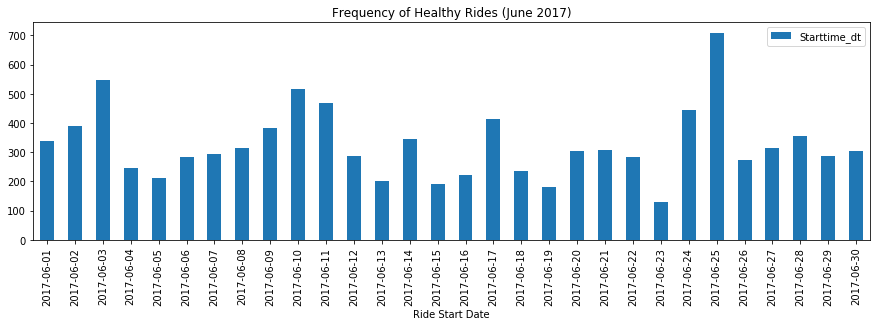

In [16]:
count_of_rides.index.name = 'Ride Start Date'

count_of_rides.plot(kind="bar", title='Frequency of Healthy Rides (June 2017)',figsize=(15,4))

### Try it yourself
We want to figure out what the most popular rides are from Q2 of 2017.

Also, we want to focus on rides which start & stop at ***different*** stations.

Lastly, we are only interested in rides that occurred more than 100 times.

*Hint: One solution leverages the* `.groupby()` *function, the* `.size()` *function, the* `.reset_index()` *function and some tricky filtering techniques.*

**BONUS:** Plot a histogram of each unique from station name in the resulting data frame, with a sum of all originating rides from each station.

*Hint: One solution again leverages the* `.groupby()` *function and the* `.sum()` *function.*

Look at the "solution.png" file in this repository to check your result.

In [17]:
diff_station_rides=rentals_df[rentals_df['From station name']!=rentals_df['To station name']]
diff_station_rides.head()

,From station name,To station name,Usertype,Tripduration_mins,Starttime_dt,Startdate
0,North Shore Trail & Fort Duquesne Bridge,S 27th St & Sidney St. (Southside Works),Customer,44.316667,2017-04-01 00:59:00,04/01/2017
1,Frew St & Schenley Dr,Boulevard of the Allies & Parkview Ave,Subscriber,4.733333,2017-04-01 01:43:00,04/01/2017
3,Forbes Ave & Grant St,Coltart Ave & Forbes Ave,Customer,161.583333,2017-04-01 05:05:00,04/01/2017
4,Boulevard of the Allies & Parkview Ave,S 22nd St & E Carson St,Subscriber,19.400000,2017-04-01 05:35:00,04/01/2017
5,42nd & Penn Ave.,Penn Ave & S Whitfield St,Subscriber,9.916667,2017-04-01 08:42:00,04/01/2017


In [18]:
diff_station_rides.shape

(17337, 6)

In [19]:
morethan100_rides=diff_station_rides.groupby(['From station name', 'To station name']).count()
morethan100_rides=morethan100_rides.drop(['Tripduration_mins','Starttime_dt','Startdate'],axis=1)
morethan100_rides.columns=['Ride counts']
morethan100_rides=morethan100_rides[morethan100_rides['Ride counts']>100]
morethan100_rides.head(15)

Ride counts
From station name                                  To station name                                                
10th St & Penn Ave (David L. Lawrence Conventio... 21st St & Penn Ave                                          153
21st St & Penn Ave                                 10th St & Penn Ave (David L. Lawrence Conventio...          132
                                                   Forbes Ave & Market Square                                  127
                                                   Liberty Ave & Stanwix St                                    134
Boulevard of the Allies & Parkview Ave             Fifth Ave & S Bouquet St                                    121
                                                   Frew St & Schenley Dr                                       143
First Ave & B St (T Station)                       S 27th St & Sidney St. (Southside Works)                    109
Forbes Ave & Market Square                         21st St & Penn Ave                                          106
                                                   Liberty Ave & Stanwix St                                    108
Frew St & Schenley Dr                              Boulevard of the Allies & Parkview Ave                      109
S 12th St & E Carson St                            S 27th St & Sidney St. (Southside Works)                    123

In [20]:
aggregated_rides=morethan100_rides.groupby(['From station name'])['Ride counts'].sum()
aggregated_rides.head()

From station name
10th St & Penn Ave (David L. Lawrence Convention Center)    153
21st St & Penn Ave                                          393
Boulevard of the Allies & Parkview Ave                      264
First Ave & B St (T Station)                                109
Forbes Ave & Market Square                                  214
Name: Ride counts, dtype: int64

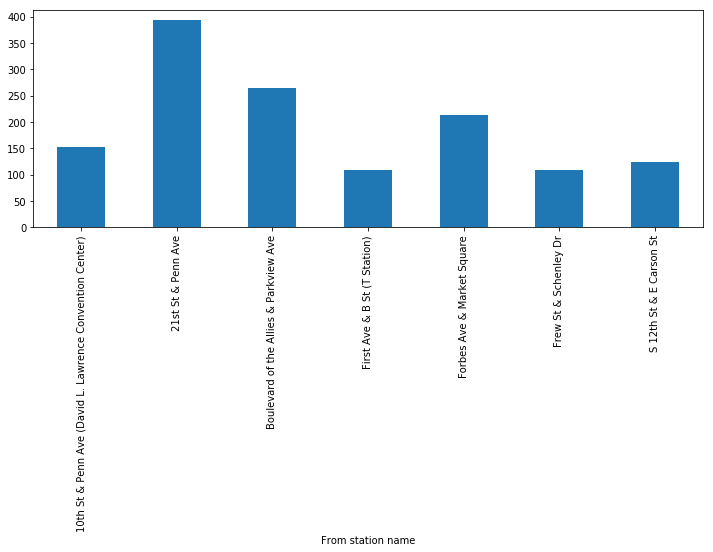

In [21]:
aggregated_rides.plot(kind='bar',figsize=(12,4))